# Why the PHL is one of the best rocket launch sites in the world 
## Article published in March 9, 2017 6:40pm @ GMA News SciTech

Link: http://www.gmanetwork.com/news/scitech/science/602582/why-the-phl-is-one-of-the-best-rocket-launch-sites-in-the-world/story/

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

Isp = 280 #specific impulse
mr = 105000 #rocket mass without fuel
rE = 6371000 # earth radius
a = 400000 #altitude
G = 6.67408e-11#grav constant
ME = 5.972e24 #earth mass
w = 7.29210e-5 #earth angular velocity
g0 = 9.8 #acceleration due to gravity

In [2]:
from IPython.display import Math
Math(r'm_f(\Phi) = m_r\Bigg({e}^{\frac{\sqrt{\frac{GM_E}{R_E + a}}- R_E \omega \cos\Phi}{i_{sp}g_o}}-1\Bigg)')

<IPython.core.display.Math object>

In [3]:
def fuel(lat):
    return mr*(np.exp((np.sqrt((G*ME)/(rE + a)) - rE*w*np.cos(np.radians(lat)))/(Isp*g0))-1)

Test first if function `fuel` works

In [4]:
ph_lat = 13 #deg

fuel(ph_lat)

1353324.1722077604

Then, clean your function and proceed to plotting.

In [5]:
def fuel(lat):
    #radial velocity, vr
    vr = np.sqrt((G*ME)/(rE + a))
    #tangential velocity, vt
    
    vt = rE*w*np.cos(np.radians(lat))
    vtj = rE*w*np.cos(np.radians(30))

    fraction = (vr - vt)/(Isp*g0)
    fraction1 = (vr - vtj)/(Isp*g0)
    
    return mr*(np.exp(fraction)-1)
    print (mr*(np.exp(fraction1)-1))

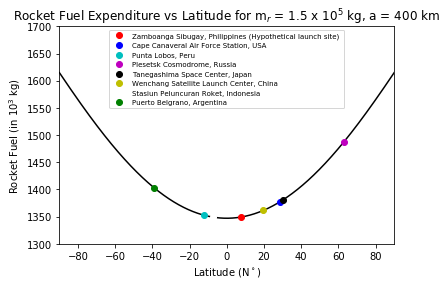

In [6]:
import numpy as np
import matplotlib.pyplot as plt

lat = np.arange(-100.0,100.0,0.10)
#plot all
plt.plot(lat, fuel(lat)/1e3, 'k-')
#plot PH

ph_lat = 7.5225 #Zamboanga Sibugay
capcav_lat = 28.474 #Cape Canaveral
Puntalobos_lat = -12.5 #Punta Lobos
Plesetsk_lat = 62.9279
Overberg_lat = -34.6027
Tanegashima_lat = 30.39
Wenchang_lat = 19.614492
StasiunPeluncuran_lat=-7.6466
Puerto_Belgrano=-38.9

plt.title('Rocket Fuel Expenditure vs Latitude for m$_r$ = 1.5 x 10$^5$ kg, a = 400 km')

#plt.plot(ph_lat, fuel(ph_lat)/1e3, 'ro')


plt.plot(ph_lat, fuel(ph_lat)/1e3, 'ro', label='Zamboanga Sibugay, Philippines (Hypothetical launch site) ' )
plt.plot(capcav_lat, fuel(capcav_lat)/1e3, 'bo', label='Cape Canaveral Air Force Station, USA' )
plt.plot(Puntalobos_lat, fuel(Puntalobos_lat)/1e3, 'co', label='Punta Lobos, Peru' )
plt.plot(Plesetsk_lat, fuel(Plesetsk_lat)/1e3, 'mo', label='Plesetsk Cosmodrome, Russia' )
plt.plot(Tanegashima_lat, fuel(Tanegashima_lat)/1e3, 'ko', label='Tanegashima Space Center, Japan ' )
plt.plot(Wenchang_lat, fuel(Wenchang_lat)/1e3, 'yo', label='Wenchang Satellite Launch Center, China' )
plt.plot(StasiunPeluncuran_lat, fuel(StasiunPeluncuran_lat)/1e3, 'wo', label='Stasiun Peluncuran Roket, Indonesia ' )
plt.plot(Puerto_Belgrano, fuel(Puerto_Belgrano)/1e3, 'go', label='Puerto Belgrano, Argentina' )

'''
plt.plot(ph_lat, fuel(ph_lat)/1e3, 'ro', label='Zamboanga Sibugay, Philippines (Hypothetical launch site),7.5225 N$^\circ$ ' )
plt.plot(30, fuel(30)/1e3, 'ko', label='Example Launch Site near Japan, 30 N$^\circ$' )
'''
plt.xlabel('Latitude (N$^\circ$)')
plt.ylabel('Rocket Fuel (in 10$^3$ kg)')
plt.ylim(1300,1700)
plt.xlim(-90, 90)

plt.legend(loc='upper center', numpoints=1, prop={'size':7})
plt.show()

# UPDATE

# Plot

Reference: https://github.com/LanzLagman/Plotting-Rocket-Launch-Sites-with-Folium

In [7]:
import pandas as pd
import wikipedia as wp

In [8]:
html = wp.page("List of rocket launch sites").html().encode("UTF-32")

In [9]:
Africa = pd.read_html(html, header=0)[2]
Africa['Loc_string'] = Africa['Coordinates'].apply(lambda name: name.split('\ufeff / ')[-1])
Africa['Location'] = Africa['Location'].apply(lambda name: name.split('[')[0])
Africa['Latitude'] = Africa['Loc_string'].apply(lambda name: name.split(';')[0]).astype(float)
Africa['Longitude'] = Africa['Loc_string'].apply(lambda name: name.split()[1].rstrip('\ufeff')).astype(float)

In [10]:
Asia = pd.read_html(html, header=0)[3]
Asia['Loc_string'] = Asia['Coordinates'].apply(lambda name: name.split('\ufeff / ')[-1])
Asia['Location'] = Asia['Location'].apply(lambda name: name.split('[')[0])
Asia['Latitude'] = Asia['Loc_string'].apply(lambda name: name.split(';')[0]).astype(float)
Asia['Longitude'] = Asia['Loc_string'].apply(lambda name: name.split()[1].rstrip('\ufeff')).astype(float)

In [11]:
Europe = pd.read_html(html, header=0)[4]
Europe['Loc_string'] = Europe['Coordinates'].apply(lambda name: name.split('\ufeff / ')[-1])
Europe['Location'] = Europe['Location'].apply(lambda name: name.split('[')[0])
Europe['Latitude'] = Europe['Loc_string'].apply(lambda name: name.split(';')[0]).astype(float)
Europe['Longitude'] = Europe['Loc_string'].apply(lambda name: name.split()[1].rstrip('\ufeff')).astype(float)

In [12]:
N_America = pd.read_html(html, header=0)[5]
N_America['Loc_string'] = N_America['Coordinates'].apply(lambda name: name.split('\ufeff / ')[-1])
N_America['Location'] = N_America['Location'].apply(lambda name: name.split('[')[0])
N_America['Latitude'] = N_America['Loc_string'].apply(lambda name: name.split(';')[0]).astype(float)
N_America['Longitude'] = N_America['Loc_string'].apply(lambda name: name.split()[1].rstrip('\ufeff')).astype(float)

In [13]:
S_America = pd.read_html(html, header=0)[7]
S_America['Loc_string'] = S_America['Coordinates'].apply(lambda name: name.split('\ufeff / ')[-1])
S_America['Location'] = S_America['Location'].apply(lambda name: name.split('[')[0])
S_America['Latitude'] = S_America['Loc_string'].apply(lambda name: name.split(';')[0]).astype(float)
S_America['Longitude'] = S_America['Loc_string'].apply(lambda name: name.split()[1].rstrip('\ufeff')).astype(float)

In [14]:
Oceania = pd.read_html(html, header=0)[8]
Oceania['Loc_string'] = Oceania['Coordinates'].apply(lambda name: name.split('\ufeff / ')[-1])
Oceania['Location'] = Oceania['Location'].apply(lambda name: name.split('[')[0])
Oceania['Latitude'] = Oceania['Loc_string'].apply(lambda name: name.split(';')[0]).astype(float)
Oceania['Longitude'] = Oceania['Loc_string'].apply(lambda name: name.split()[1].rstrip('\ufeff')).astype(float)

## Update each dataframes

In [15]:
Africa['plot_color'] = str('black')
Asia['plot_color'] = str('orange')
Europe['plot_color'] = str('blue')
N_America['plot_color'] = str('red')
S_America['plot_color'] = str('red')
Oceania['plot_color'] = str('green')

In [16]:
Africa['Continent'] = str('Africa')
Asia['Continent'] = str('Asia')
Europe['Continent'] = str('Europe')
N_America['Continent'] = str('North America')
S_America['Continent'] = str('South America')
Oceania['Continent'] = str('Australia and Oceania')

## Combine by concat

In [17]:
World = pd.concat([Africa, Asia, Europe, N_America, S_America, Oceania], ignore_index=True)
World

,Country,Location,Coordinates,Operational date,Number of rocket launches,Heaviest rocket launched,Highest achieved altitude,Notes,Loc_string,Latitude,Longitude,plot_color,Continent
0,Algeria,"Hammaguira French Special Weapons Test Centre,...",31°05′58″N 2°50′09″W﻿ / ﻿31.09951°N 2.83581°W﻿...,1947–1967,NaN,18 000 kg,Orbital,Operated by France.[1],31.09951; -2.83581﻿ (Hammaguir),31.099510,-2.835810,black,Africa
1,Algeria,Reggane,26°43′08″N 0°16′37″E﻿ / ﻿26.71895°N 0.27691°E﻿...,1961–1965,10,NaN,NaN,NaN,26.71895; 0.27691﻿ (Reggane),26.718950,0.276910,black,Africa
2,Congo (Zaire),"Shaba North, Kapani Tonneo OTRAG Launch Center",7°55′33″S 28°31′40″E﻿ / ﻿7.92587°S 28.52766°E﻿...,1977–1978,3,NaN,<50 km,German OTRAG rockets.[2],-7.92587; 28.52766﻿ (Kapani Tonneo),-7.925870,28.527660,black,Africa
3,Egypt,Jabal Hamzah ballistic missile test and launch...,30°07′32.7″N 30°36′18.5″E﻿ / ﻿30.125750°N 30.6...,Late 1950s–present,6,NaN,NaN,Al Zafir and Al Kahir SRBMs testing[3][4],30.125750; 30.605139﻿ (Jabal Hamzah),30.125750,30.605139,black,Africa
4,Kenya,"Broglio Space Centre (San Marco), Malindi",2°56′27″S 40°12′48″E﻿ / ﻿2.94080°S 40.21340°E﻿...,1964–1988,27,20 000 kg,Orbital,"Scout rockets, operated by ASI and Sapienza Un...",-2.94080; 40.21340﻿ (San Marco platform),-2.940800,40.213400,black,Africa
5,Libya,"Sabha, Tawiwa OTRAG Launch Center",26°59′38″N 14°27′51″E﻿ / ﻿26.99392°N 14.46425°...,1981–1982,NaN,NaN,50 km,German OTRAG rockets.[6],26.99392; 14.46425﻿ (Sabha),26.993920,14.464250,black,Africa
6,Mauritania,Nouadhibou,20°55′43″N 17°01′54″W﻿ / ﻿20.92856°N 17.03153°...,1973–1973,1,NaN,NaN,During a solar eclipse,20.92856; -17.03153﻿ (Nouadhibou),20.928560,-17.031530,black,Africa
7,South Africa,Overberg South African Test Centre,34°36′10″S 20°18′09″E﻿ / ﻿34.60265°S 20.30248°...,1989–1990,NaN,NaN,NaN,Launched test mission rockets only.[7],-34.60265; 20.30248﻿ (Overberg),-34.602650,20.302480,black,Africa
8,China,"Base 603, Shijiedu, Guangde",30°56′15″N 119°12′21″E﻿ / ﻿30.93743°N 119.2057...,1960–1966,NaN,1 000 kg,<60 km,NaN,30.93743; 119.20575﻿ (Shijiedu),30.937430,119.205750,orange,Asia
9,China,Jiuquan Satellite Launch Center,41°07′05″N 100°27′48″E﻿ / ﻿41.11803°N 100.4633...,1970–,NaN,464 000 kg,Orbital,Human spaceflight[8],41.11803; 100.46330﻿ (Jiuquan),41.118030,100.463300,orange,Asia


In [18]:
import folium
from folium.plugins import MarkerCluster

In [19]:
Map = folium.Map(location=[0,0], height=525, width=650, tiles="OpenStreetMap", 
                   zoom_start=1)
Map

In [20]:
for i in np.arange(len(World)):
    folium.CircleMarker([World['Latitude'][i], World['Longitude'][i]], 
                  radius=2.5, color=World['plot_color'][i], fill=True, fill_color=World['plot_color'][i], fill_opacity=0.5,
                  popup=folium.Popup('{0} \n Coordinates: {1}'.format(World['Location'].values[i], 
                         World['Coordinates'][i].split('\ufeff / ')[1]),parse_html=True)
                  ).add_to(Map)

Map    

In [21]:
World[World['Number of rocket launches']=='>2000']

,Country,Location,Coordinates,Operational date,Number of rocket launches,Heaviest rocket launched,Highest achieved altitude,Notes,Loc_string,Latitude,Longitude,plot_color,Continent
14,India,"Vikram Sarabhai Space Centre, Thiruvananthapur...",8°31′53″N 76°52′08″E﻿ / ﻿8.5314°N 76.8690°E﻿ /...,1962–,>2000,NaN,NaN,[12],8.5314; 76.8690﻿ (Vikram Sarabhai Space Centre),8.5314,76.869,orange,Asia


## What if the Philippines had a rocket launch site?

In [26]:
Asia.tail(2)

,Country,Location,Coordinates,Operational date,Number of rocket launches,Heaviest rocket launched,Highest achieved altitude,Notes,Loc_string,Latitude,Longitude,plot_color,Continent
35,Russia,"Vostochny Cosmodrome, Amur Oblast, Russia",51°52′59″N 128°19′59″E﻿ / ﻿51.883°N 128.333°E﻿...,28 April 2016[32]–,NaN,NaN,NaN,Facility on Russian territory to supplement Ba...,51.883; 128.333﻿ (Vostochny),51.883,128.333,orange,Asia
36,Taiwan,Haiqian,22°06′N 120°54′E﻿ / ﻿22.10°N 120.90°E﻿ / 22.10...,1988–,NaN,10 000 kg,300 km,Science and technology development,22.10; 120.90﻿ (Gangzi),22.100,120.900,orange,Asia


In [59]:
Phl = pd.DataFrame([['Philippines', 'Sarangani', "5°26'35.16″N 128°29'9.24″E\ufeff / 5.4431 °N 128.4859 °E",
                     np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 
                   5.4431, 128.4859, 'orange', 'Asia']], columns=Asia.columns)
Phl

,Country,Location,Coordinates,Operational date,Number of rocket launches,Heaviest rocket launched,Highest achieved altitude,Notes,Loc_string,Latitude,Longitude,plot_color,Continent
0,Philippines,Sarangani,5°26'35.16″N 128°29'9.24″E﻿ / 5.4431 °N 128.48...,NaN,NaN,NaN,NaN,NaN,NaN,5.4431,128.4859,orange,Asia


In [60]:
Asia_w_Phl = pd.concat([Asia,Phl],ignore_index=True)
Asia_w_Phl

,Country,Location,Coordinates,Operational date,Number of rocket launches,Heaviest rocket launched,Highest achieved altitude,Notes,Loc_string,Latitude,Longitude,plot_color,Continent
0,China,"Base 603, Shijiedu, Guangde",30°56′15″N 119°12′21″E﻿ / ﻿30.93743°N 119.2057...,1960–1966,NaN,1 000 kg,<60 km,NaN,30.93743; 119.20575﻿ (Shijiedu),30.937430,119.205750,orange,Asia
1,China,Jiuquan Satellite Launch Center,41°07′05″N 100°27′48″E﻿ / ﻿41.11803°N 100.4633...,1970–,NaN,464 000 kg,Orbital,Human spaceflight[8],41.11803; 100.46330﻿ (Jiuquan),41.118030,100.463300,orange,Asia
2,China,Taiyuan Satellite Launch Center,39°08′36″N 111°58′03″E﻿ / ﻿39.14321°N 111.9674...,1980–,NaN,NaN,Orbital,Polar satellites[9],39.14321; 111.96741﻿ (Taiyuan),39.143210,111.967410,orange,Asia
3,China,Xichang Satellite Launch Center,28°14′47″N 102°01′41″E﻿ / ﻿28.24646°N 102.0281...,1984–,NaN,NaN,Lunar,"Geo-synchronous satellites, lunar probes.[10][11]",28.24646; 102.02814﻿ (Xichang),28.246460,102.028140,orange,Asia
4,China,Wenchang Satellite Launch Center,19°36′52.17″N 110°57′4.08″E﻿ / ﻿19.6144917°N 1...,2016–,NaN,879 000 kg,Orbital,New site on Hainan Island with pads for Long M...,19.6144917; 110.9511333﻿ (Wenchang),19.614492,110.951133,orange,Asia
5,China,Jingyu,42°00′N 126°30′E﻿ / ﻿42.0°N 126.5°E﻿ / 42.0; 1...,NaN,NaN,NaN,NaN,NaN,42.0; 126.5﻿ (Jingyu),42.000000,126.500000,orange,Asia
6,India,"Vikram Sarabhai Space Centre, Thiruvananthapur...",8°31′53″N 76°52′08″E﻿ / ﻿8.5314°N 76.8690°E﻿ /...,1962–,>2000,NaN,NaN,[12],8.5314; 76.8690﻿ (Vikram Sarabhai Space Centre),8.531400,76.869000,orange,Asia
7,India,"Satish Dhawan Space Centre (Sriharikota), Andh...",13°44′15″N 80°14′06″E﻿ / ﻿13.73740°N 80.23510°...,1971–,NaN,402 000 kg,Interplanetary,Satellites and lunar probes;[13],13.73740; 80.23510﻿ (Sriharikota),13.737400,80.235100,orange,Asia
8,India,Abdul Kalam Island,20°45′29″N 87°05′08″E﻿ / ﻿20.75804°N 87.085533...,NaN,NaN,NaN,NaN,NaN,20.75804; 87.085533﻿ (Abdul kalam Island),20.758040,87.085533,orange,Asia
9,Indonesia,"Stasiun Peluncuran Roket, Pameungpeuk, Garut",7°38′48″S 107°41′20″E﻿ / ﻿7.646643°S 107.68901...,1965–,14+,765 kg,100 km,NaN,-7.646643; 107.689018﻿ (Pameungpeuk),-7.646643,107.689018,orange,Asia


In [61]:
World_w_Phl = pd.concat([Africa, Asia_w_Phl, Europe, N_America, S_America, Oceania], ignore_index=True)
World_w_Phl

,Country,Location,Coordinates,Operational date,Number of rocket launches,Heaviest rocket launched,Highest achieved altitude,Notes,Loc_string,Latitude,Longitude,plot_color,Continent
0,Algeria,"Hammaguira French Special Weapons Test Centre,...",31°05′58″N 2°50′09″W﻿ / ﻿31.09951°N 2.83581°W﻿...,1947–1967,NaN,18 000 kg,Orbital,Operated by France.[1],31.09951; -2.83581﻿ (Hammaguir),31.099510,-2.835810,black,Africa
1,Algeria,Reggane,26°43′08″N 0°16′37″E﻿ / ﻿26.71895°N 0.27691°E﻿...,1961–1965,10,NaN,NaN,NaN,26.71895; 0.27691﻿ (Reggane),26.718950,0.276910,black,Africa
2,Congo (Zaire),"Shaba North, Kapani Tonneo OTRAG Launch Center",7°55′33″S 28°31′40″E﻿ / ﻿7.92587°S 28.52766°E﻿...,1977–1978,3,NaN,<50 km,German OTRAG rockets.[2],-7.92587; 28.52766﻿ (Kapani Tonneo),-7.925870,28.527660,black,Africa
3,Egypt,Jabal Hamzah ballistic missile test and launch...,30°07′32.7″N 30°36′18.5″E﻿ / ﻿30.125750°N 30.6...,Late 1950s–present,6,NaN,NaN,Al Zafir and Al Kahir SRBMs testing[3][4],30.125750; 30.605139﻿ (Jabal Hamzah),30.125750,30.605139,black,Africa
4,Kenya,"Broglio Space Centre (San Marco), Malindi",2°56′27″S 40°12′48″E﻿ / ﻿2.94080°S 40.21340°E﻿...,1964–1988,27,20 000 kg,Orbital,"Scout rockets, operated by ASI and Sapienza Un...",-2.94080; 40.21340﻿ (San Marco platform),-2.940800,40.213400,black,Africa
5,Libya,"Sabha, Tawiwa OTRAG Launch Center",26°59′38″N 14°27′51″E﻿ / ﻿26.99392°N 14.46425°...,1981–1982,NaN,NaN,50 km,German OTRAG rockets.[6],26.99392; 14.46425﻿ (Sabha),26.993920,14.464250,black,Africa
6,Mauritania,Nouadhibou,20°55′43″N 17°01′54″W﻿ / ﻿20.92856°N 17.03153°...,1973–1973,1,NaN,NaN,During a solar eclipse,20.92856; -17.03153﻿ (Nouadhibou),20.928560,-17.031530,black,Africa
7,South Africa,Overberg South African Test Centre,34°36′10″S 20°18′09″E﻿ / ﻿34.60265°S 20.30248°...,1989–1990,NaN,NaN,NaN,Launched test mission rockets only.[7],-34.60265; 20.30248﻿ (Overberg),-34.602650,20.302480,black,Africa
8,China,"Base 603, Shijiedu, Guangde",30°56′15″N 119°12′21″E﻿ / ﻿30.93743°N 119.2057...,1960–1966,NaN,1 000 kg,<60 km,NaN,30.93743; 119.20575﻿ (Shijiedu),30.937430,119.205750,orange,Asia
9,China,Jiuquan Satellite Launch Center,41°07′05″N 100°27′48″E﻿ / ﻿41.11803°N 100.4633...,1970–,NaN,464 000 kg,Orbital,Human spaceflight[8],41.11803; 100.46330﻿ (Jiuquan),41.118030,100.463300,orange,Asia


In [62]:
Map_w_Phl = folium.Map(location=[0,0], height=525, width=650, tiles="OpenStreetMap", 
                   zoom_start=1)
Map_w_Phl

In [63]:
for i in np.arange(len(World_w_Phl)):
    folium.CircleMarker([World_w_Phl['Latitude'][i], World_w_Phl['Longitude'][i]], 
                  radius=2.5, color=World_w_Phl['plot_color'][i], fill=True, fill_color=World_w_Phl['plot_color'][i], fill_opacity=0.5,
                  popup=folium.Popup('{0} \n Coordinates: {1}'.format(World_w_Phl['Location'].values[i], 
                         World_w_Phl['Coordinates'][i].split('\ufeff / ')[1]),parse_html=True)
                  ).add_to(Map_w_Phl)

Map_w_Phl    

## Add rocket fuel consumption...

In [64]:
Isp = 280 #specific impulse
mr = 105000 #rocket mass without fuel
rE = 6371000 # earth radius
a = 400000 #altitude
G = 6.67408e-11#grav constant
ME = 5.972e24 #earth mass
w = 7.29210e-5 #earth angular velocity
g0 = 9.8 #acceleration due to gravity

In [65]:
World_w_Phl['Fuel_Consumed'] = fuel(World_w_Phl['Latitude'])

In [66]:
World_w_Phl

,Country,Location,Coordinates,Operational date,Number of rocket launches,Heaviest rocket launched,Highest achieved altitude,Notes,Loc_string,Latitude,Longitude,plot_color,Continent,Fuel_Consumed
0,Algeria,"Hammaguira French Special Weapons Test Centre,...",31°05′58″N 2°50′09″W﻿ / ﻿31.09951°N 2.83581°W﻿...,1947–1967,NaN,18 000 kg,Orbital,Operated by France.[1],31.09951; -2.83581﻿ (Hammaguir),31.099510,-2.835810,black,Africa,1.382777e+06
1,Algeria,Reggane,26°43′08″N 0°16′37″E﻿ / ﻿26.71895°N 0.27691°E﻿...,1961–1965,10,NaN,NaN,NaN,26.71895; 0.27691﻿ (Reggane),26.718950,0.276910,black,Africa,1.373498e+06
2,Congo (Zaire),"Shaba North, Kapani Tonneo OTRAG Launch Center",7°55′33″S 28°31′40″E﻿ / ﻿7.92587°S 28.52766°E﻿...,1977–1978,3,NaN,<50 km,German OTRAG rockets.[2],-7.92587; 28.52766﻿ (Kapani Tonneo),-7.925870,28.527660,black,Africa,1.349360e+06
3,Egypt,Jabal Hamzah ballistic missile test and launch...,30°07′32.7″N 30°36′18.5″E﻿ / ﻿30.125750°N 30.6...,Late 1950s–present,6,NaN,NaN,Al Zafir and Al Kahir SRBMs testing[3][4],30.125750; 30.605139﻿ (Jabal Hamzah),30.125750,30.605139,black,Africa,1.380598e+06
4,Kenya,"Broglio Space Centre (San Marco), Malindi",2°56′27″S 40°12′48″E﻿ / ﻿2.94080°S 40.21340°E﻿...,1964–1988,27,20 000 kg,Orbital,"Scout rockets, operated by ASI and Sapienza Un...",-2.94080; 40.21340﻿ (San Marco platform),-2.940800,40.213400,black,Africa,1.347334e+06
5,Libya,"Sabha, Tawiwa OTRAG Launch Center",26°59′38″N 14°27′51″E﻿ / ﻿26.99392°N 14.46425°...,1981–1982,NaN,NaN,50 km,German OTRAG rockets.[6],26.99392; 14.46425﻿ (Sabha),26.993920,14.464250,black,Africa,1.374041e+06
6,Mauritania,Nouadhibou,20°55′43″N 17°01′54″W﻿ / ﻿20.92856°N 17.03153°...,1973–1973,1,NaN,NaN,During a solar eclipse,20.92856; -17.03153﻿ (Nouadhibou),20.928560,-17.031530,black,Africa,1.363319e+06
7,South Africa,Overberg South African Test Centre,34°36′10″S 20°18′09″E﻿ / ﻿34.60265°S 20.30248°...,1989–1990,NaN,NaN,NaN,Launched test mission rockets only.[7],-34.60265; 20.30248﻿ (Overberg),-34.602650,20.302480,black,Africa,1.391153e+06
8,China,"Base 603, Shijiedu, Guangde",30°56′15″N 119°12′21″E﻿ / ﻿30.93743°N 119.2057...,1960–1966,NaN,1 000 kg,<60 km,NaN,30.93743; 119.20575﻿ (Shijiedu),30.937430,119.205750,orange,Asia,1.382410e+06
9,China,Jiuquan Satellite Launch Center,41°07′05″N 100°27′48″E﻿ / ﻿41.11803°N 100.4633...,1970–,NaN,464 000 kg,Orbital,Human spaceflight[8],41.11803; 100.46330﻿ (Jiuquan),41.118030,100.463300,orange,Asia,1.408927e+06


In [67]:
len(World)

110

In [68]:
len(World_w_Phl)

111

In [69]:
World_w_Phl[['Country','Location','Coordinates','Fuel_Consumed']].sort_values(by='Fuel_Consumed').head(10)

,Country,Location,Coordinates,Fuel_Consumed
35,Maldives,Gan Island,0°41′36″S 73°09′24″E﻿ / ﻿0.69328°S 73.15672°E﻿...,1.347028e+06
100,Brazil,"Alcântara Launch Center, Maranhão",2°18′58″S 44°22′03″W﻿ / ﻿2.3160°S 44.3676°W﻿ /...,1.347211e+06
4,Kenya,"Broglio Space Centre (San Marco), Malindi",2°56′27″S 40°12′48″E﻿ / ﻿2.94080°S 40.21340°E﻿...,1.347334e+06
101,French Guiana,"Guiana Space Centre, Kourou",5°14′15″N 52°46′10″W﻿ / ﻿5.23739°N 52.76950°W﻿...,1.348036e+06
45,Philippines,Sarangani,5°26'35.16″N 128°29'9.24″E﻿ / 5.4431 °N 128.48...,1.348119e+06
98,Brazil,Natal/Barreira,5°51′58″S 35°22′59″W﻿ / ﻿5.86600°S 35.38300°W﻿...,1.348298e+06
104,Suriname,Coronie,5°52′21″N 56°17′21″W﻿ / ﻿5.87241°N 56.28908°W﻿...,1.348300e+06
17,Indonesia,"Stasiun Peluncuran Roket, Pameungpeuk, Garut",7°38′48″S 107°41′20″E﻿ / ﻿7.646643°S 107.68901...,1.349197e+06
2,Congo (Zaire),"Shaba North, Kapani Tonneo OTRAG Launch Center",7°55′33″S 28°31′40″E﻿ / ﻿7.92587°S 28.52766°E﻿...,1.349360e+06
14,India,"Vikram Sarabhai Space Centre, Thiruvananthapur...",8°31′53″N 76°52′08″E﻿ / ﻿8.5314°N 76.8690°E﻿ /...,1.349733e+06
